In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline

## listing_clean.csv ###

In [2]:
#read the data
df = pd.read_csv('./Data/listings_clean.csv')
print(df.columns.values)
df.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count'
 'price']


,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


In [5]:
y = df['price']

0        160
1        105
2         58
3        185
4        195
5        165
6         80
7        120
8        150
9         40
10       150
11        75
12        80
13       110
14       189
15       200
16        95
17       125
18        35
19       165
20       100
21       110
22        65
23       200
24       150
25       300
26       255
27       150
28       299
29       195
        ... 
27362    120
27363    250
27364    105
27365    199
27366    159
27367     90
27368    120
27369    100
27370    165
27371    150
27372    180
27373    250
27374     65
27375    100
27376     73
27377    195
27378    250
27379    275
27380    145
27381     59
27382    165
27383     85
27384    100
27385    210
27386    190
27387    130
27388    139
27389     99
27390     55
27391    110
Name: price, dtype: int64

In [56]:
#Feature Extraction:
#Use the features we decided last time
features = ['neighbourhood_cleansed', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'number_of_reviews', 'review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 
            'review_scores_checkin', 'review_scores_communication', 
            'review_scores_location', 'review_scores_value', 'host_listing_count']



In [57]:
df_x = df[features]
df_x

,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,Midtown East,New York,40.756852,-73.964754,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,62,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,Hamilton Heights,New York,40.830599,-73.941014,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,22,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,Bushwick,Brooklyn,40.692189,-73.924120,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,35,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,West Village,New York,40.734751,-74.002592,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,26,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,Chelsea,New York,40.745282,-73.997836,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1
5,Carroll Gardens,Brooklyn,40.679060,-73.994730,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,16,96.0,10.0,9.0,10.0,9.0,10.0,9.0,2
6,Bushwick,Brooklyn,40.684422,-73.909882,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Chinatown,New York,40.719319,-73.997247,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,East Village,New York,40.726022,-73.986418,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,14,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4
9,Bedford-Stuyvesant,Brooklyn,40.686420,-73.934402,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,10,94.0,10.0,9.0,10.0,10.0,9.0,9.0,4


In [58]:
to_float = ['latitude', 'longitude','accommodates', 
            'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 
            'review_scores_checkin', 'review_scores_communication', 
            'review_scores_location', 'review_scores_value','host_listing_count']

In [59]:
for feature_name in to_float:
    df_x[feature_name] = df_x[feature_name].astype(float)
   

/Users/amy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Now we start imputing missing values. We fill in numerical values with the mean of its columns, fill in categorical values with most common value of its column.

In [60]:
categorical = (df_x.dtypes.values != np.dtype('float64'))

cate = df_x.columns.values[categorical]
nume = df_x.columns.values[~categorical]

df_x_cate = df_x[cate].apply(lambda x:x.fillna(x.value_counts().index[0]))
df_x_nume = df_x[nume].apply(lambda x:x.fillna(x.mean()))

df_x = pd.concat([df_x_cate, df_x_nume], axis=1)


In [61]:
df_x

,neighbourhood_cleansed,city,property_type,room_type,bed_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,Midtown East,New York,Apartment,Entire home/apt,Real Bed,40.756852,-73.964754,2.0,1.000000,1.00000,1.0,62.0,86.000000,9.000000,7.000000,9.000000,9.000000,10.00000,9.000000,1.0
1,Hamilton Heights,New York,Apartment,Entire home/apt,Real Bed,40.830599,-73.941014,10.0,1.000000,3.00000,3.0,22.0,85.000000,8.000000,8.000000,9.000000,8.000000,7.00000,8.000000,2.0
2,Bushwick,Brooklyn,Apartment,Private room,Real Bed,40.692189,-73.924120,2.0,1.000000,1.00000,2.0,35.0,98.000000,10.000000,10.000000,10.000000,10.000000,9.00000,10.000000,4.0
3,West Village,New York,Apartment,Entire home/apt,Real Bed,40.734751,-74.002592,2.0,1.000000,1.00000,1.0,26.0,96.000000,10.000000,9.000000,10.000000,10.000000,10.00000,9.000000,1.0
4,Chelsea,New York,Apartment,Entire home/apt,Real Bed,40.745282,-73.997836,2.0,1.000000,1.00000,2.0,1.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,1.0
5,Carroll Gardens,Brooklyn,Apartment,Entire home/apt,Real Bed,40.679060,-73.994730,6.0,1.000000,2.00000,3.0,16.0,96.000000,10.000000,9.000000,10.000000,9.000000,10.00000,9.000000,2.0
6,Bushwick,Brooklyn,Apartment,Private room,Real Bed,40.684422,-73.909882,2.0,1.000000,1.00000,1.0,0.0,92.218895,9.365229,9.011093,9.576274,9.665184,9.24866,9.125737,1.0
7,Chinatown,New York,Apartment,Private room,Real Bed,40.719319,-73.997247,2.0,1.000000,1.00000,1.0,0.0,92.218895,9.365229,9.011093,9.576274,9.665184,9.24866,9.125737,1.0
8,East Village,New York,Apartment,Entire home/apt,Real Bed,40.726022,-73.986418,4.0,1.000000,2.00000,2.0,14.0,96.000000,10.000000,9.000000,9.000000,10.000000,10.00000,9.000000,4.0
9,Bedford-Stuyvesant,Brooklyn,Apartment,Shared room,Real Bed,40.686420,-73.934402,2.0,1.000000,1.00000,1.0,10.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.00000,9.000000,4.0


Now we encode categorical variables.

In [62]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    

categorical = (df_x.dtypes.values != np.dtype('float64'))
# Encode all labels
df_x= df_x.apply(encode_categorical)


# Get numpy array from data
x = df_x.values


# Apply one hot endcoing
encoder = preprocessing.OneHotEncoder(categorical_features=categorical, sparse=False)  


x = encoder.fit_transform(x)
x

array([[  0.,   0.,   0., ...,  10.,   9.,   1.],
       [  0.,   0.,   0., ...,   7.,   8.,   2.],
       [  0.,   0.,   0., ...,   9.,  10.,   4.],
       ..., 
       [  0.,   0.,   0., ...,   9.,   8.,  15.],
       [  0.,   0.,   0., ...,   9.,  10.,   7.],
       [  0.,   0.,   0., ...,  10.,  10.,   2.]])

In [63]:
print x.shape
print y.shape

(27392, 412)
(27392,)


Now we've already preprocessed data in both files. We could start build models. We split our training dataset into train data and test data.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [65]:
print 'train data: ', x_train.shape
print 'test data: ', x_test.shape

train data:  (19174, 412)
test data:  (8218, 412)


In [66]:
#OLS
import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X)
results = model.fit()

In [67]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     22.75
Date:                Sun, 27 Nov 2016   Prob (F-statistic):               0.00
Time:                        14:45:58   Log-Likelihood:            -1.2780e+05
No. Observations:               19174   AIC:                         2.563e+05
Df Residuals:                   18821   BIC:                         2.591e+05
Df Model:                         352                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -1212.3739    263.782     -4.596      0.0

R square is 0.3. Exists strong multicollinearity problems.

## Exploring how calendar and reviews can be integrated to listing ##

In [22]:
df[:10]

,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195
5,68914,1106,11231.0,40.679060,-73.994730,0,0,6,1.0,2.0,...,2536.0,96.0,10.0,9.0,10.0,9.0,10.0,9.0,2,165
6,4832596,1779,11207.0,40.684422,-73.909882,0,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80
7,2562510,2264,10013.0,40.719319,-73.997247,0,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,120
8,3005360,1811,10003.0,40.726022,-73.986418,0,0,4,1.0,2.0,...,2547.0,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4,150
9,2431607,1862,11221.0,40.686420,-73.934402,0,2,2,1.0,1.0,...,2436.0,94.0,10.0,9.0,10.0,10.0,9.0,9.0,4,40


In [28]:
XX = df[df['id'] == 3005360]
print XX.shape

(1, 31)


In [29]:
XX

,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
8,3005360,1811,10003.0,40.726022,-73.986418,0,0,4,1.0,2.0,...,2547.0,96.0,10.0,9.0,9.0,10.0,10.0,9.0,4,150


In [3]:
#read the calendar data
calendar = pd.read_csv('./Data/calendar_cleaned.csv')
print(calendar.columns.values)
calendar.head()

['listing_id' 'date' 'available' 'price_cleaned']


,listing_id,date,available,price_cleaned
0,3604481,2015-01-01,t,600.0
1,3604481,2015-01-02,t,600.0
2,3604481,2015-01-03,t,600.0
3,3604481,2015-01-04,t,600.0
4,3604481,2015-01-05,t,600.0


(274, 4)


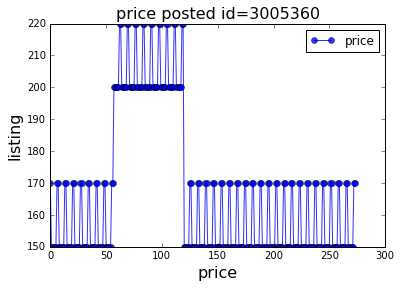

In [34]:
# pick id=3005360 from df, check if we can find price listed by the id over the year
ZZ = calendar[calendar['listing_id'] == 3005360]
print ZZ.shape

# plot price of id=3005360
fig, ax_score = plt.subplots(1, 1, figsize=(6, 4))
# plot training data
ax_score.plot(range(274), ZZ['price_cleaned'], 'bo-', label = 'price', alpha = 0.8)
ax_score.set_xlabel('price', fontsize=16)
ax_score.set_ylabel('listing', fontsize=16)
ax_score.set_title('price posted id=3005360', fontsize=16)
ax_score.legend(loc = 0, fontsize = 12)

### Price variation versus time ###
- For the same listing_ide, we can find out typical price (in listings), holiday price (from calendar), and weekend (also from calendar).
- Then, we may train 3 models that predict typical price, holiday price and weekend price?

In [8]:
#read the review data
reviews = pd.read_csv('./Data/reviews_cleaned.csv')
print(reviews.columns.values)
reviews.head()

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments'
 'if_English']


,listing_id,id,date,reviewer_id,reviewer_name,comments,if_English
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an...",1
1,722394,9248781,2013-12-16,6821360,Giri,Extremely disappointed.,1
2,4074444,23983183,2014-12-15,8822691,Wendy,Exactly as described.,1
3,68774,23987149,2014-12-15,23170531,Anthony,The reservation was canceled the day before ar...,1
4,920951,16985911,2014-08-05,16614692,Anthony,Very Nice and comfortable. Great location - Ma...,1


In [26]:
YY = reviews[reviews['listing_id'] == 3005360]
print YY.shape

(13, 7)


In [27]:
YY

,listing_id,id,date,reviewer_id,reviewer_name,comments,if_English
232650,3005360,24207043,2014-12-22,17573740,Tommy,"Great apartment, legit 2 bedroom with a comfy ...",1
232651,3005360,23867690,2014-12-13,734070,Steve,This was a really great experience. \n\nFast r...,1
232652,3005360,23635959,2014-12-07,8921252,Tash,We had a great stay at Jenn's apartment which ...,1
232653,3005360,23119406,2014-11-23,215720,Jacquie,Jen was so sweet and accommodating. The apartm...,1
232654,3005360,23081286,2014-11-22,21620164,Max,"Jen was great, very welcoming and easy to comm...",1
232655,3005360,22911550,2014-11-17,16679129,J.P.,Jen's place was exactly what we were expecting...,1
232656,3005360,22618808,2014-11-10,15824842,Evan,Jen's apartment was great. I was in New York f...,1
232657,3005360,22506924,2014-11-08,22685758,Adam,"Perfect, exactly as advertised. Jen is charmin...",1
232658,3005360,22405178,2014-11-05,3578439,Liezl,Jen's apartment was just like she described. I...,1
232659,3005360,21794392,2014-10-24,7041862,New,Perfection! Just enough space! Great location ...,1


### Reviews from the same listing_id are pretty consistent ###
- We can think of a way to parse reviews and just classify review comments as 'positive', 'neutral', and 'negative'. Then, we can check if review classification is related to price.
- Another idea that we discussed is to find keywords such as 'large', 'clean', 'convenient' etc.